In [ ]:
from google.colab import drive
drive.mount('/content/drive')

"from google.colab import drive\ndrive.mount('/content/drive')"

This is the second model I constructed using the new dataset.

This script contains normalization and label encoding, feedforward model, model improvement, and regularization.

## Load the data



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Redback_B/Heart_2022/heart_2022_no_nans.csv')

In [ ]:
df.shape # examine the shape and determine its rank

(246022, 40)

In [ ]:
# Show data types and number of null values for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
# show all columns in df.head()
pd.set_option('display.max_columns', None)
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack HadAngina HadStroke  \
0         9.0            Non

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# separate features and labels
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

# split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test, random_state=42)

# Now I will use X_train, X_test, X_val and y_train, y_test, y_val

In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
object_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [ ]:
# These columns have values with some sort of order. I will use label encoder.
columns_to_check = ['LastCheckupTime', 'RemovedTeeth', 'SmokerStatus',
                    'ECigaretteUsage', 'RaceEthnicityCategory',
                    'AgeCategory', 'TetanusLast10Tdap']
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

LastCheckupTime: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']
RemovedTeeth: ['None of them' '6 or more, but not all' '1 to 5' 'All']
SmokerStatus: ['Former smoker' 'Never smoked' 'Current smoker - now smokes every day'
 'Current smoker - now smokes some days']
ECigaretteUsage: ['Never used e-cigarettes in my entire life' 'Use them some days'
 'Not at all (right now)' 'Use them every day']
RaceEthnicityCategory: ['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']
AgeCategory: ['Age 65 to 69' 'Age 70 to 74' 'Age 75 to 79' 'Age 80 or older'
 'Age 50 to 54' 'Age 40 to 44' 'Age 60 to 64' 'Age 55 to 59'
 'Age 45 to 49' 'Age 35 to 39' 'Age 25 to 29' 'Age 30 to 34'
 'Age 18 to 24']
TetanusLast10Tdap: ['Yes, received Tdap' 'Yes, received tetanus shot but not sure what type

In [ ]:
numeric_columns = X_train.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


In [ ]:
# Use LabelEncoder to convert object columns
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to object columns
for column in object_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])
    X_val[column] = label_encoder.transform(X_val[column])


# Normalize numerical columns
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])

In [ ]:
# Apply label encoding to target variables
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

In [ ]:
X_train.info()
#type(y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147613 entries, 59490 to 168296
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      147613 non-null  int64  
 1   Sex                        147613 non-null  int64  
 2   GeneralHealth              147613 non-null  int64  
 3   PhysicalHealthDays         147613 non-null  float64
 4   MentalHealthDays           147613 non-null  float64
 5   LastCheckupTime            147613 non-null  int64  
 6   PhysicalActivities         147613 non-null  int64  
 7   SleepHours                 147613 non-null  float64
 8   RemovedTeeth               147613 non-null  int64  
 9   HadAngina                  147613 non-null  int64  
 10  HadStroke                  147613 non-null  int64  
 11  HadAsthma                  147613 non-null  int64  
 12  HadSkinCancer              147613 non-null  int64  
 13  HadCOPD                  

In [ ]:
print(f'Shape of my datasets are: {X_train.shape}, {X_test.shape} and {X_val.shape}.')

Shape of my datasets are: (147613, 39), (49205, 39) and (49204, 39).


## Setting up a model for training

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, optimizers, utils

# Set Python random seed
np.random.seed(42)
# Set TensorFlow random seed
tf.random.set_seed(42)

# Set input_shape as (39,) based on the number of features in X_train
input_shape = (39,)

'''model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid activation for binary classification
])'''

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                2560      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401

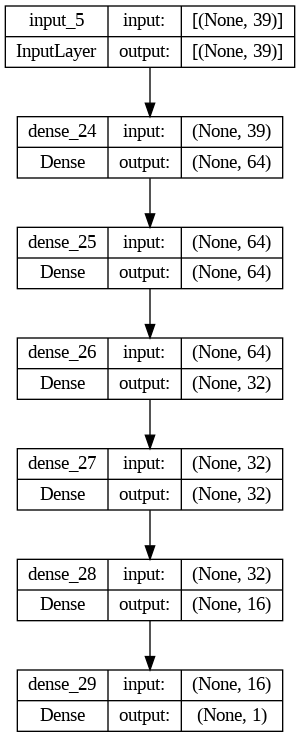

In [ ]:
# plot my model
utils.plot_model(model=model,  # provide the model to be plotted
                 to_file='model_plot_Binary_Classification.png', # name of the file to be saved as
                 show_shapes=True, # whether to display shape information
                 show_layer_names=True, # whether to display layer names
                 rankdir='TB', # TB creates a vertical plot; LR creates a horizontal plot
                 expand_nested=True) # recursively expand nested models

In [ ]:
print(f'Shape of my datasets are: {X_train.shape}, {X_test.shape} and {X_val.shape}.')

Shape of my datasets are: (147613, 39), (49205, 39) and (49204, 39).


## Fitting the model

In [ ]:
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Changed to binary crossentropy
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
# save the initial weights for later experiments
init_weights = model.get_weights() # Get the initial weights of the network

In [ ]:
# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/20
4613/4613 [==============================] - 22s 4ms/step - loss: 0.1600 - accuracy: 0.9465 - val_loss: 0.1493 - val_accuracy: 0.9477
Epoch 2/20
4613/4613 [==============================] - 18s 4ms/step - loss: 0.1491 - accuracy: 0.9475 - val_loss: 0.1512 - val_accuracy: 0.9474
Epoch 3/20
4613/4613 [==============================] - 18s 4ms/step - loss: 0.1472 - accuracy: 0.9480 - val_loss: 0.1493 - val_accuracy: 0.9475
Epoch 4/20
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1462 - accuracy: 0.9483 - val_loss: 0.1482 - val_accuracy: 0.9485
Epoch 5/20
4613/4613 [==============================] - 25s 6ms/step - loss: 0.1453 - accuracy: 0.9484 - val_loss: 0.1472 - val_accuracy: 0.9484
Epoch 6/20
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1447 - accuracy: 0.9489 - val_loss: 0.1474 - val_accuracy: 0.9488
Epoch 7/20
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1440 - accuracy: 0.9490 - val_loss: 0.1472 - val_ac

### Compile the model
The model.compile function sets up the configuration needed for training the model. The optimizer determines how the model's weights are updated to minimize the loss function, and the loss function quantifies the model's performance. The evaluation metric, accuracy, is used to monitor how well the model is when working on the validation data.

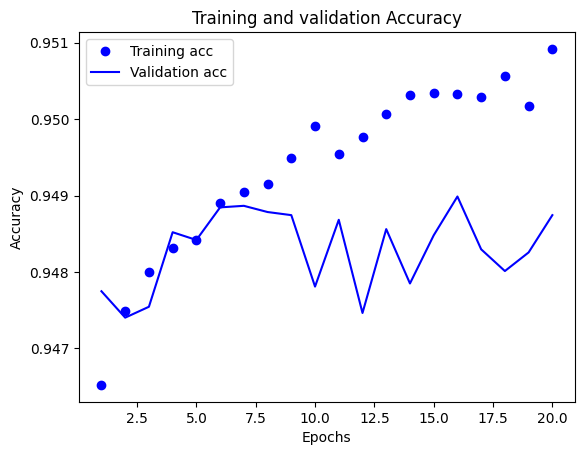

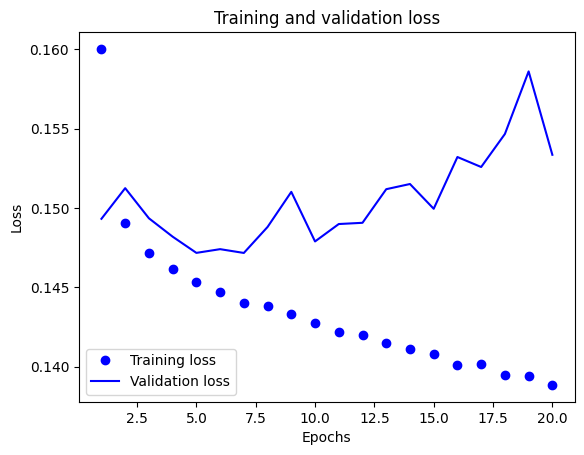

1538/1538 [==============================] - 3s 2ms/step - loss: 0.1502 - accuracy: 0.9481


[0.15019962191581726, 0.9480947256088257]

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
results = model.evaluate(X_test, y_test)
results

## Improve the model

In [ ]:
!rm -rf ./logs/

from datetime import datetime
import os

root_logdir = "logs" # Root log directory
run_id = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(root_logdir, run_id) # Directory of the log files

callbacks = [
    tf.keras.callbacks.TensorBoard(
        log_dir=logdir, # Directory where the log files will be written
        histogram_freq=1 # How often to compute activation and weight histograms (1 epoch)
    ) # Callback that streams epoch results to TensorBoard.
]


# reset the training
model.set_weights(init_weights) # Reset the weights of the network to the initial weights

history = model.fit(
                    X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    callbacks=callbacks
                    )


Epoch 1/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1581 - accuracy: 0.9466
Epoch 2/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1484 - accuracy: 0.9475
Epoch 3/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1468 - accuracy: 0.9480
Epoch 4/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1461 - accuracy: 0.9486
Epoch 5/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1452 - accuracy: 0.9486
Epoch 6/10
4613/4613 [==============================] - 16s 4ms/step - loss: 0.1445 - accuracy: 0.9488
Epoch 7/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1437 - accuracy: 0.9491
Epoch 8/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.1434 - accuracy: 0.9493
Epoch 9/10
4613/4613 [==============================] - 16s 4ms/step - loss: 0.1430 - accuracy: 0.9496
Epoch 10/10
4613/4613 [==============================] - 16s 4ms/step - l

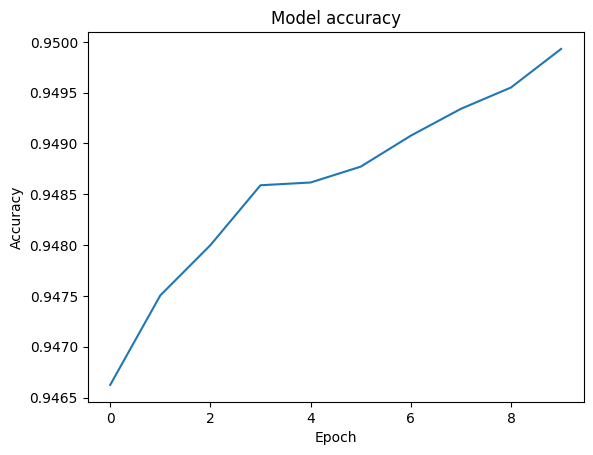

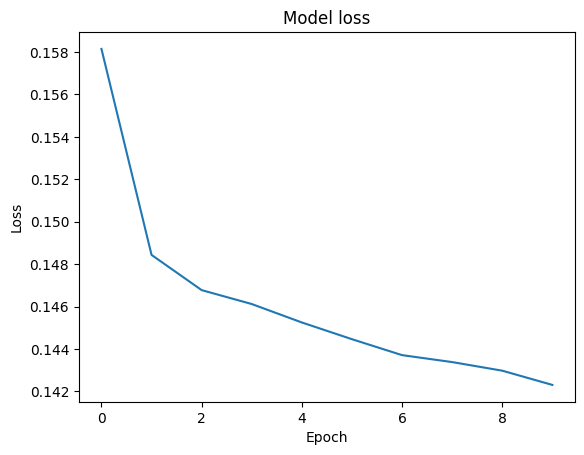

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


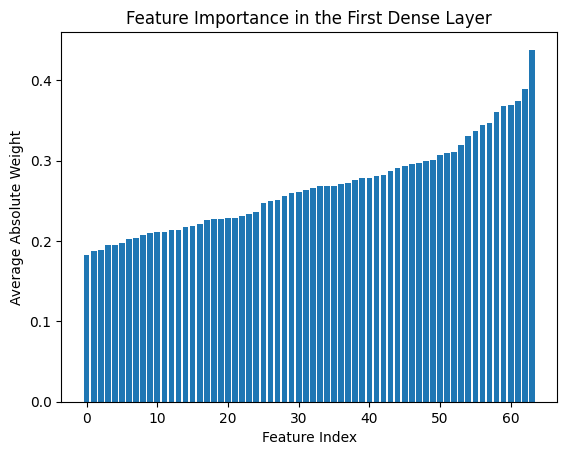

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your model is named 'model'
weights = model.layers[1].get_weights()[0]  # Get weights of the first dense layer

# Visualize feature importance
feature_importance = np.mean(np.abs(weights), axis=1)
sorted_indices = np.argsort(feature_importance)

plt.bar(range(len(feature_importance)), feature_importance[sorted_indices])
plt.xlabel('Feature Index')
plt.ylabel('Average Absolute Weight')
plt.title('Feature Importance in the First Dense Layer')
plt.show()


In [ ]:
feature_weights = list(zip(X_train.columns, feature_importance))

# Sort by weight
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

# Print feature names and their weights
for feature, weight in sorted_feature_weights:
    print(f"{feature}: {weight}")

HadDiabetes: 0.4378319978713989
ECigaretteUsage: 0.38921719789505005
HIVTesting: 0.36924606561660767
BMI: 0.3605917990207672
HadSkinCancer: 0.34681054949760437
DifficultyWalking: 0.34418684244155884
State: 0.3368881940841675
AlcoholDrinkers: 0.33037590980529785
HadAngina: 0.3097941279411316
SmokerStatus: 0.30030184984207153
HadKidneyDisease: 0.2995770573616028
LastCheckupTime: 0.29538190364837646
PhysicalHealthDays: 0.2868138253688812
BlindOrVisionDifficulty: 0.280234694480896
DifficultyErrands: 0.2785855531692505
HadArthritis: 0.27794528007507324
MentalHealthDays: 0.27576249837875366
HighRiskLastYear: 0.2722455561161041
PhysicalActivities: 0.2689329981803894
HadCOPD: 0.2685612440109253
RaceEthnicityCategory: 0.2679663896560669
DeafOrHardOfHearing: 0.26387104392051697
RemovedTeeth: 0.26116079092025757
HadDepressiveDisorder: 0.2560077905654907
HadAsthma: 0.2504759430885315
PneumoVaxEver: 0.24695181846618652
HadStroke: 0.2339245229959488
SleepHours: 0.2259311079978943
ChestScan: 0.218820

### Apply regularisation

In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal')
])

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
4613/4613 [==============================] - 19s 4ms/step - loss: 0.3089 - accuracy: 0.9374 - val_loss: 0.1782 - val_accuracy: 0.9454
Epoch 2/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.2015 - accuracy: 0.9444 - val_loss: 0.1847 - val_accuracy: 0.9454
Epoch 3/10
4613/4613 [==============================] - 18s 4ms/step - loss: 0.2029 - accuracy: 0.9440 - val_loss: 0.1784 - val_accuracy: 0.9454
Epoch 4/10
4613/4613 [==============================] - 18s 4ms/step - loss: 0.2027 - accuracy: 0.9438 - val_loss: 0.1839 - val_accuracy: 0.9454
Epoch 5/10
4613/4613 [==============================] - 18s 4ms/step - loss: 0.2058 - accuracy: 0.9439 - val_loss: 0.1814 - val_accuracy: 0.9454
Epoch 6/10
4613/4613 [==============================] - 18s 4ms/step - loss: 0.2041 - accuracy: 0.9437 - val_loss: 0.1844 - val_accuracy: 0.9454
Epoch 7/10
4613/4613 [==============================] - 17s 4ms/step - loss: 0.2087 - accuracy: 0.9438 - val_loss: 0.1842 - val_ac

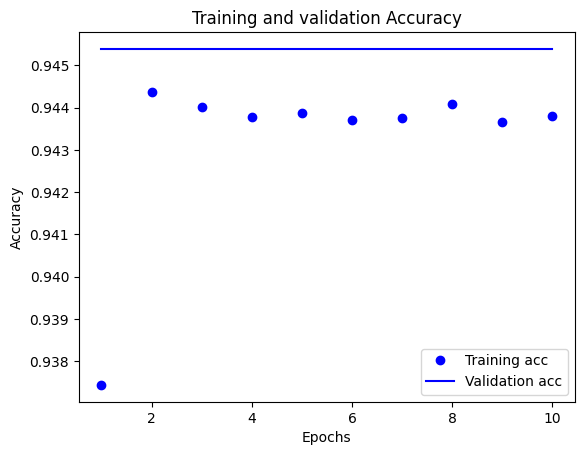

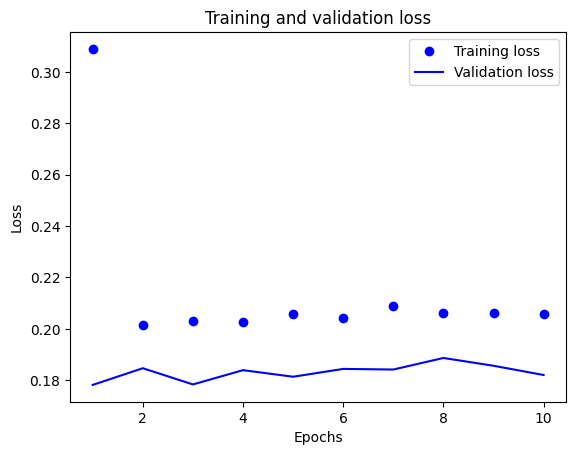

1538/1538 [==============================] - 6s 4ms/step - loss: 0.1778 - accuracy: 0.9454


[0.17777149379253387, 0.9453917145729065]

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
results = model.evaluate(X_test, y_test)
results